# Importamos Librerias de Python

In [3]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, RandomTreesEmbedding
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
import matplotlib.pyplot as plt

# Preparando data para el analisis

#### Paso 1: Importamos la data

In [4]:
mydata = pd.read_csv("sorted_dna_seq_F26_all_data.csv") # comando para subir la data
mydata.head(3) # comando para visualizar la data

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s179,s180,s181,s182,s183,s184,s185,s186,sequence,F
0,-2.92,-7.15,-8.32,-7.48,-4.33,-6.17,-7.55,-5.78,-3.48,-7.33,...,6.31,-1.48,-1.67,-2.94,-0.95,4.08,-4.06,-1.14,CCCGATGGTCCACATGCTCCTTAGAAGAGCTAGCCGTCGATAGACC...,2.4044
1,-10.59,-3.52,-6.09,-2.47,-3.38,-7.68,-10.83,-10.44,-11.32,-9.98,...,-1.27,6.11,-3.06,-2.45,4.48,-1.55,-1.76,-3.59,GTTCTGGGTTAATACTGATCGGAAGAGCAAGTGGGCTCAGTCAACA...,2.2380
2,-8.93,-8.06,-7.47,-4.91,-2.42,-2.37,-9.01,-9.43,-3.12,-2.52,...,-4.19,5.88,-1.43,-0.64,-2.26,-4.18,-3.00,5.89,TGTATCCCATGCCCTCTCAGAAGAGCGAATGCTTAACTACATAGAG...,2.0745


#### Paso 2: Separamos variables dependientes (y) de independientes (x)

In [6]:
var_dep = mydata["F"] # cogemos la columna de nombre insuranceclaim
var_ind = mydata.drop(["sequence","F"],axis=1) # cogemos TODAS las columnas menos la que dice insuranceclaim (drop)
var_ind.head(3)

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s177,s178,s179,s180,s181,s182,s183,s184,s185,s186
0,-2.92,-7.15,-8.32,-7.48,-4.33,-6.17,-7.55,-5.78,-3.48,-7.33,...,-0.51,-3.77,6.31,-1.48,-1.67,-2.94,-0.95,4.08,-4.06,-1.14
1,-10.59,-3.52,-6.09,-2.47,-3.38,-7.68,-10.83,-10.44,-11.32,-9.98,...,-1.66,-2.88,-1.27,6.11,-3.06,-2.45,4.48,-1.55,-1.76,-3.59
2,-8.93,-8.06,-7.47,-4.91,-2.42,-2.37,-9.01,-9.43,-3.12,-2.52,...,-2.69,5.21,-4.19,5.88,-1.43,-0.64,-2.26,-4.18,-3.00,5.89


#### Paso 3: Normalizamos la data  (warning)

In [8]:
var_ind_norm = StandardScaler().fit_transform(var_ind)
print("ready")

ready


#### Paso 4: Dividimos la data en data de entrenamiento y data de testeo

In [9]:
# Cuando se hace machine learning, siempre se divide la data en data de entrenamiento y data de testeo
x_train, x_test, y_train, y_test = train_test_split(var_ind_norm, var_dep, test_size=0.25, random_state=0)
print("ready")

ready


# Random Forest en 4 pasos

#### Paso 1: Importamos el modelo que queremos usar.

In [10]:
from sklearn.ensemble import RandomForestRegressor

#### Paso 2: Creamos una variable de clase Regresion Logistica

In [11]:
clf=RandomForestRegressor(max_depth=4,n_estimators=100)

#### Paso 3: Entrenamos el modelo basado en la data

In [12]:
clf.fit(x_train, y_train) # entrena el modelo (data de entrenamie)
print("ready")

ready


#### Paso 4: Predecimos usando el modelo entrenado

In [14]:
predictions = clf.predict(x_test)
print("ready") # revisa si termino el codigo (rstc)

ready


## Importancia de las variables (MUY IMPORTANTE)

In [15]:
clf.feature_importances_

array([2.63601720e-03, 1.27910283e-03, 4.36499727e-02, 3.80907582e-02,
       4.69670259e-03, 9.93375318e-04, 6.54092488e-04, 4.40228375e-02,
       3.37575286e-02, 7.99398933e-04, 3.58687034e-03, 4.82924266e-03,
       1.10672232e-02, 3.61440864e-02, 9.50715792e-03, 1.35185047e-04,
       1.29120486e-03, 1.04457881e-02, 2.09141873e-01, 3.33633565e-02,
       8.77073741e-04, 8.88755392e-04, 5.67582687e-03, 7.94202682e-02,
       1.11213294e-02, 7.07656173e-04, 9.29395104e-03, 7.02453857e-03,
       5.70068775e-02, 6.50633056e-02, 3.70115098e-03, 6.97639738e-04,
       1.56932547e-03, 5.13093203e-03, 6.56022678e-02, 6.46157823e-03,
       4.28627043e-04, 5.33999315e-04, 4.84343094e-03, 6.72271738e-03,
       3.17330456e-03, 8.18066391e-04, 8.87540467e-04, 5.45358867e-03,
       7.51887340e-03, 2.34810853e-03, 0.00000000e+00, 2.36838747e-04,
       1.09834509e-03, 1.67619457e-03, 1.68155931e-03, 3.37551440e-05,
       4.84841734e-04, 0.00000000e+00, 7.15241614e-04, 5.10204312e-04,
      

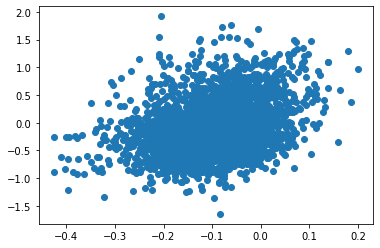

In [16]:
plt.plot(predictions,y_test,'o')